In [50]:
import pandas as pd
df = pd.read_csv("Dataset_disease.csv")

In [51]:
df.replace({'prognosis':{'(vertigo) Paroymsal  Positional Vertigo':0,'Acne':1,'AIDS':2,'Alcoholic hepatitis':3,'Allergy':4,
'Arthritis':5,'Bronchial Asthma':6,'Cervical spondylosis':7,'Chicken pox':8,'Chronic cholestasis':9,'Common Cold':10,
'Dengue':11,'Diabetes ':12,'Dimorphic hemmorhoids(piles)':13,'Drug Reaction':14,'Fungal infection':15,'Gastroenteritis':16,
'GERD':17,'Heart attack':18,'hepatitis A':19,'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,
'Hypertension ':24,'Hyperthyroidism':25,'Hypoglycemia':26,'Hypothyroidism':27,'Impetigo':28,'Jaundice':29,'Malaria':30,
'Migraine':31,'Osteoarthristis':32,'Paralysis (brain hemorrhage)':33,'Peptic ulcer diseae':34,'Pneumonia':35,'Psoriasis':36,
'Tuberculosis':37,'Typhoid':38,'Urinary tract infection':39,'Varicose veins':40}},inplace=True)

In [52]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [53]:
import numpy as np
X = np.asarray(df.drop('prognosis', axis = 'columns'))
y = np.asarray(df['prognosis'])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, stratify = y)

In [55]:
# Convert the labels into a set of 10 numbers to input into the neural network
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[132]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer="adam",
    loss="mae",
    metrics=['accuracy'],
)

In [67]:
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
16/16 [==============================] - 1s 61ms/step - loss: 0.1010 - accuracy: 0.9445 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 2/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 3/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 5/100
16/16 [==============================] - 0s 26ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 6/100
16/16 [==============================] - 0s 26ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 7/100
16/16 [==============================] - 0s 21ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 

<AxesSubplot:>

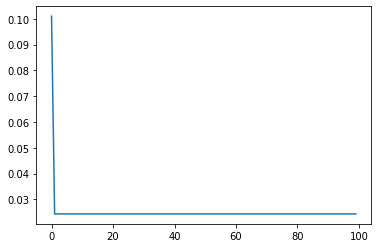

In [68]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [70]:
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/500
16/16 [==============================] - 1s 32ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 2/500
16/16 [==============================] - 0s 26ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 3/500
16/16 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 4/500
16/16 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 5/500
16/16 [==============================] - 0s 25ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 6/500
16/16 [==============================] - 0s 19ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 7/500
16/16 [==============================] - 0s 18ms/step - loss: 0.0244 - accuracy: 0.9756 - val_loss: 0.0244 - val_accuracy: 0.9756
Epoch 

Minimum validation loss: 0.024390239268541336


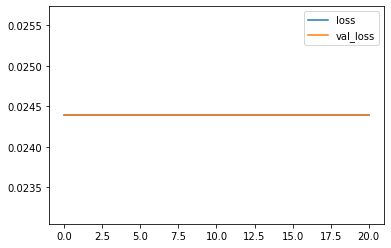

In [71]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

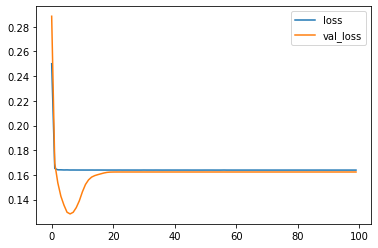

In [72]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[132]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='mae',
     metrics=['accuracy']
)

history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();